In [140]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import pyplot
from seaborn import lineplot
import os

In [141]:
df = pd.read_csv(os.path.join(r"C:\Users\mohan\Machine-learning-models\datasets",'diabetes.csv'))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [142]:
#cleaning and processing the data(Normalization)
features = df.drop("Outcome", axis=1)
target   = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
training_scaler = MinMaxScaler().fit(X_train)
training_set = training_scaler.transform(X_train)
testing_scaler = MinMaxScaler().fit(X_test)
testing_set = testing_scaler.transform(X_test)

In [143]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 8)
KNN_classifier.fit(training_set, y_train)
y_predict = KNN_classifier.predict(testing_set)

In [144]:
#Calculating accuracy of the model 
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(roc_auc_score(y_test, y_predict))

Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        99
           1       0.75      0.44      0.55        55

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154

0.6777777777777778


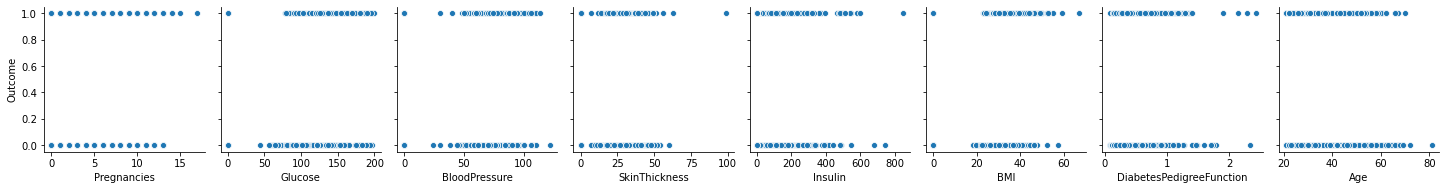

In [160]:
#Visualizing the outcome 
sns.pairplot(data=df, y_vars = ['Outcome'], x_vars = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                                                      'BMI','DiabetesPedigreeFunction','Age'], diag_kind="hist")
pyplot.show()